In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from scRNA.simulation import generate_toy_data, split_source_target
from scRNA.nmf_clustering import NmfClustering_initW

In [48]:
n_genes = 100
n_trg = 300
n_src = 300
cluster_spec = [1, 2, 3, [4, 5], [6, [7, 8]]]

In [49]:
data, labels = generate_toy_data(num_genes=n_genes, 
                                 num_cells=n_trg + n_src, 
                                 cluster_spec=cluster_spec)
print(data.shape)

(100, 600)


0 58


Text(0,0.5,'Genes')

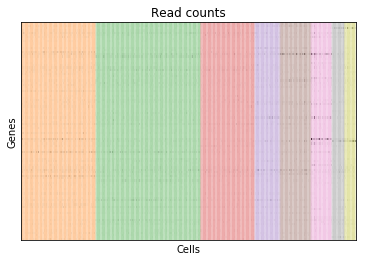

In [50]:
plt.figure(0)
print(np.min(data), np.max(data))
inds = np.argsort(labels)
plt.pcolor(data[:, inds] / np.max(data), cmap='Greys')
plt.clim(0.,+1.)
plt.xticks([])
plt.yticks([])
for i in range(len(labels)):
    plt.vlines(i, 0, n_genes, colors='C{0}'.format(labels[inds[i]]), alpha=0.15)
plt.title('Read counts')
plt.xlabel('Cells')
plt.ylabel('Genes')

In [77]:
data_source, data_target, true_labels_source, true_labels_target = \
    split_source_target(
        data,
        labels,
        target_ncells = 100,
        source_ncells = 400,
        source_clusters = None,
        noise_target = True,
        noise_sd = 0.5,
        mode = 7,
        common = 3,
        cluster_spec = cluster_spec
    )

trg_labels = np.unique(true_labels_target)
src_labels = np.unique(true_labels_source)
print(np.unique(true_labels_source))
print(np.unique(true_labels_target))

[1 2 3 6 7 8]
[1 3 4 5 6 7]


In [83]:
nmf = NmfClustering_initW(data_source, np.arange(n_genes), labels=true_labels_source, num_cluster=src_labels.size)
nmf.apply()
nmf.print_reconstruction_error(data_source, nmf.dictionary, nmf.data_matrix)

nmf.cluster_labels


('  Elementwise absolute reconstruction error   : ', 0.82868582082206244)
('  Fro-norm reconstruction error               : ', 0.0058833402896077231)


array([4, 0, 0, 0, 0, 0, 2, 4, 0, 2, 0, 0, 5, 2, 3, 2, 0, 0, 3, 3, 0, 3, 0,
       2, 0, 5, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 5, 0, 4, 2, 4, 0, 0, 4,
       5, 0, 2, 0, 0, 2, 2, 2, 2, 0, 3, 0, 3, 2, 2, 5, 0, 2, 2, 5, 0, 0, 0,
       2, 2, 0, 2, 0, 5, 0, 2, 3, 2, 5, 3, 5, 2, 2, 5, 5, 2, 2, 4, 0, 2, 1,
       0, 5, 5, 0, 2, 2, 0, 5, 3, 0, 2, 0, 2, 0, 2, 0, 5, 2, 4, 4, 4, 0, 0,
       2, 3, 3, 0, 5, 5, 2, 3, 2, 2, 2, 0, 0, 0, 2, 3, 0, 2, 3, 3, 4, 0, 0,
       2, 2, 0, 0, 5, 0, 2, 2, 0, 0, 2, 0, 5, 2, 0, 2, 4, 0, 2, 4, 3, 2, 0,
       5, 5, 2, 2, 5, 0, 2, 5, 0, 2, 5, 0, 2, 0, 0, 2, 0, 0, 2, 5, 2, 0, 2,
       5, 2, 0, 5, 2, 2, 0, 0, 0, 2, 4, 2, 0, 0, 2, 0, 0, 2, 5, 2, 5, 5, 0,
       0, 5, 5, 2, 2, 4, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 4, 2, 2, 5, 1, 5, 2,
       0, 2, 3, 4, 0, 0, 4, 2, 2, 0, 5, 5, 2, 0, 2, 0, 4, 2, 2, 4, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 3, 2, 3, 5, 3, 5, 4, 2, 2, 1, 2, 5, 2, 3, 0,
       5, 2, 3, 2, 0, 0, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,